In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import arange
from math import sqrt

In [2]:
def euler_method(function_list, x_list, y_0_list, n):
    m = len(y_0_list)
    h = (x_list[-1] - x_list[0])/n
    
    new_x = arange(x_list[0], x_list[-1] + h, h)
    
    new_ys = []
    for i in range(m):
        new_ys.append([y_0_list[i]])
        
    for i in range(1, len(new_x)):
        for j in range(m):
            new_ys[j].append( new_ys[j][i - 1] + h * function_list[j](new_x[i - 1], *[new_ys[k][i - 1] for k in range(m)]) )
            
    return (new_x, new_ys)

def euler_method_recal(function_list, x_list, y_0_list, n):
    m = len(y_0_list)
    h = (x_list[-1] - x_list[0])/n
    
    new_x = arange(x_list[0], x_list[-1] + h, h)
    
    new_ys = []
    for i in range(m):
        new_ys.append([y_0_list[i]])
        
    for i in range(1, len(new_x)):
        for j in range(m):
            new_ys[j].append(new_ys[j][i - 1] + 
                h * (function_list[j](new_x[i - 1], *[new_ys[k][i - 1] for k in range(m)]) 
                    + function_list[j](new_x[i], *[new_ys[k][i - 1] + h 
                        * function_list[j](new_x[i - 1], *[new_ys[k][i - 1] for k in range(m)]) for k in range(m)]))/2)
            
    return (new_x, new_ys)

def runge_kutta_4(function_list, x_list, y_0_list, n):
    m = len(y_0_list)
    h = (x_list[-1] - x_list[0])/n
    
    new_x = arange(x_list[0], x_list[-1] + h, h)
    
    new_ys = []
    for i in range(m):
        new_ys.append([y_0_list[i]])
        
    for i in range(1, len(new_x)):
         for j in range(m):
            k_1 = function_list[j](new_x[i - 1], *[new_ys[k][i - 1] for k in range(m)])
            k_2 = function_list[j](new_x[i - 1] + h/2, *[new_ys[k][i - 1] + k_1 * h/2 for k in range(m)])
            k_3 = function_list[j](new_x[i - 1] + h/2, *[new_ys[k][i - 1] + k_2 * h/2 for k in range(m)])
            k_4 = function_list[j](new_x[i - 1] + h, *[new_ys[k][i - 1] + k_3 for k in range(m)])
            new_ys[j].append(new_ys[j][i - 1] + h * (k_1 + 2 * k_2 + 2 * k_3 + k_4)/6) 
            
    return (new_x, new_ys)

Самолет движется по прямой с постоянной скоростью $V_1$ . Его преследует другой самолет с постоянной скоростью $V_2$ , в начальный момент находящийся на расстоянии $a$ от первого по перпендикуляру к его вектора скорости. Преследующий самолет постоянно держит курс на преследуемого. Найти уравнение линии движения преследующего самолета.
$$$$
Система ЛДУ имеет вид:
$$
    \begin{cases} 
        \frac{dy}{dt} = V_{2}\frac{\eta(t) - y}{\sqrt{(\varepsilon(t) - x)^2 + (\eta(t) - y)^2}}
        \\
        \frac{dx}{dt} = V_{2}\frac{\varepsilon(t) - x}{\sqrt{(\varepsilon(t) - x)^2 + (\eta(t) - y)^2}}
    \end{cases}
$$

In [3]:
V_1 = 3 #target speed
V_2 = 4 #tail speed
k = V_1/V_2 
a = 15 #distance from tail to target

#starting condiotions
x_0 = a 
y_0 = 0

#target coordinates
theta = lambda x : V_1 * x
epsilon = lambda x : 0 * x

def x_t(t, *args):
    (X, Y) = args
    return V_2 * (epsilon(t) - X)/sqrt((epsilon(t) - X) ** 2 + (theta(t) - Y) ** 2)

def y_t(t, *args):
    (X, Y) = args
    return V_2 * (theta(t) - Y)/sqrt((epsilon(t) - X) ** 2 + (theta(t) - Y) ** 2)

start, end, h, n = 0, 6.5, 0.1, 15

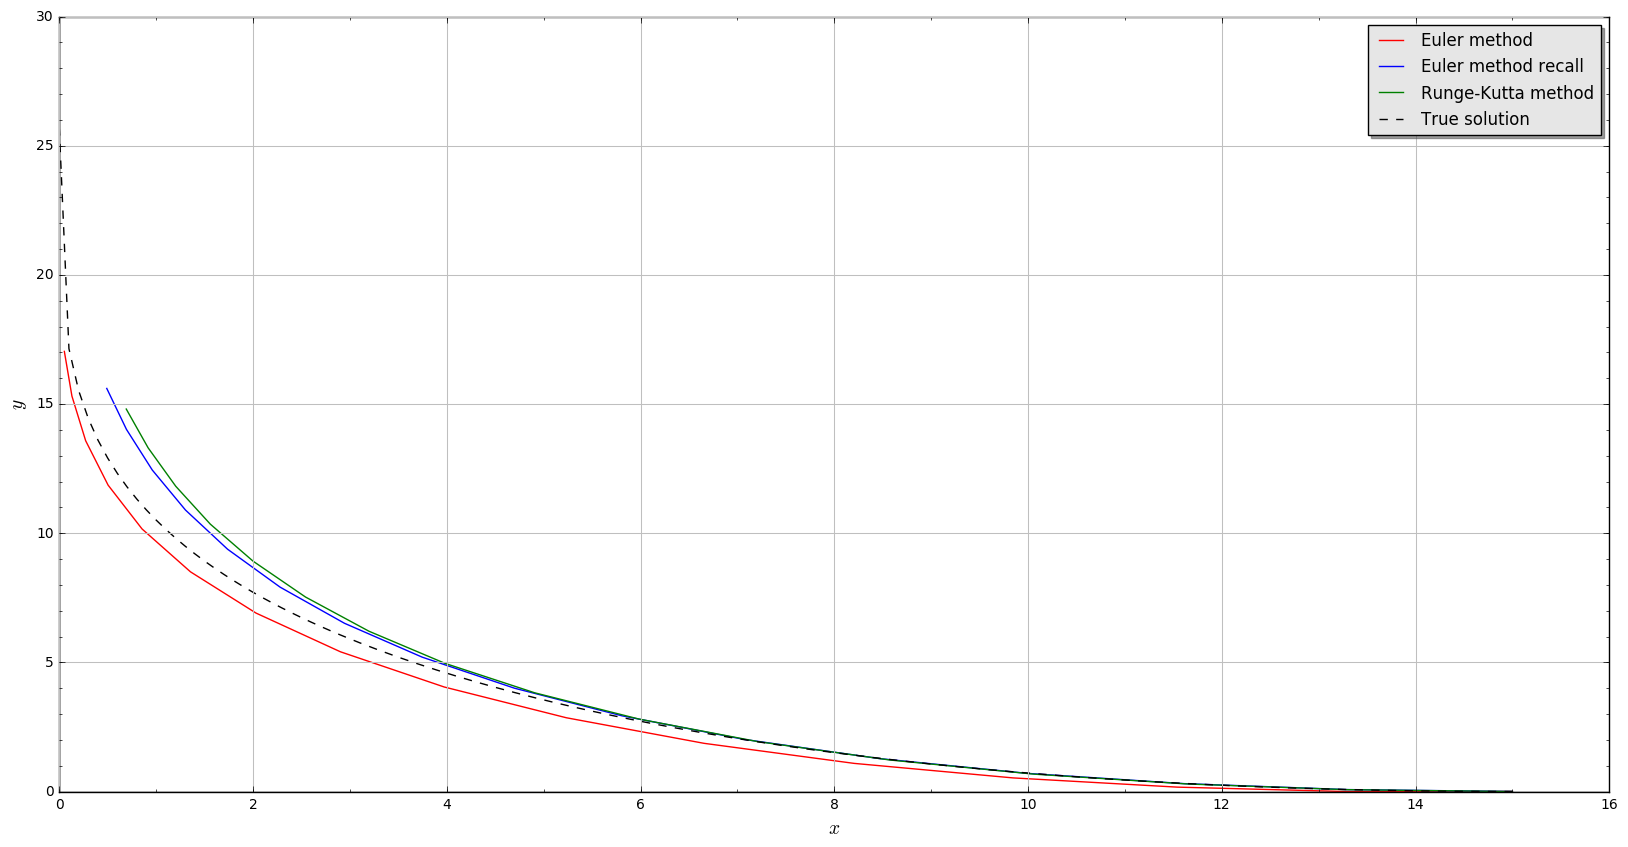

In [4]:
fig, ax = plt.subplots(figsize=(20,10))

xs, ys = euler_method([x_t, y_t], arange(start, end + h, h), [x_0, y_0], n)
ax.plot(ys[0], ys[1], '-r',label = 'Euler method')

xs, ys = euler_method_recal([x_t, y_t], arange(start, end + h, h), [x_0, y_0], n)
ax.plot(ys[0], ys[1], '-b',label = 'Euler method recall')

xs, ys = runge_kutta_4([x_t, y_t], arange(start, end + h, h), [x_0, y_0], n)
ax.plot(ys[0], ys[1], '-g',label = 'Runge-Kutta method')

true_line = lambda x : (x ** (k + 1)/((a ** k) * (k + 1)) - ((a ** k) * (x ** (1 - k)))/(1 - k))/2 + a * k/(1 - (k ** 2))
xs = arange(0, a + h, h)
ys = [true_line(x) for x in xs]
ax.plot(xs, ys, '--k', label = 'True solution')

plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color = 'black')
ax.axvline(0, color = 'black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

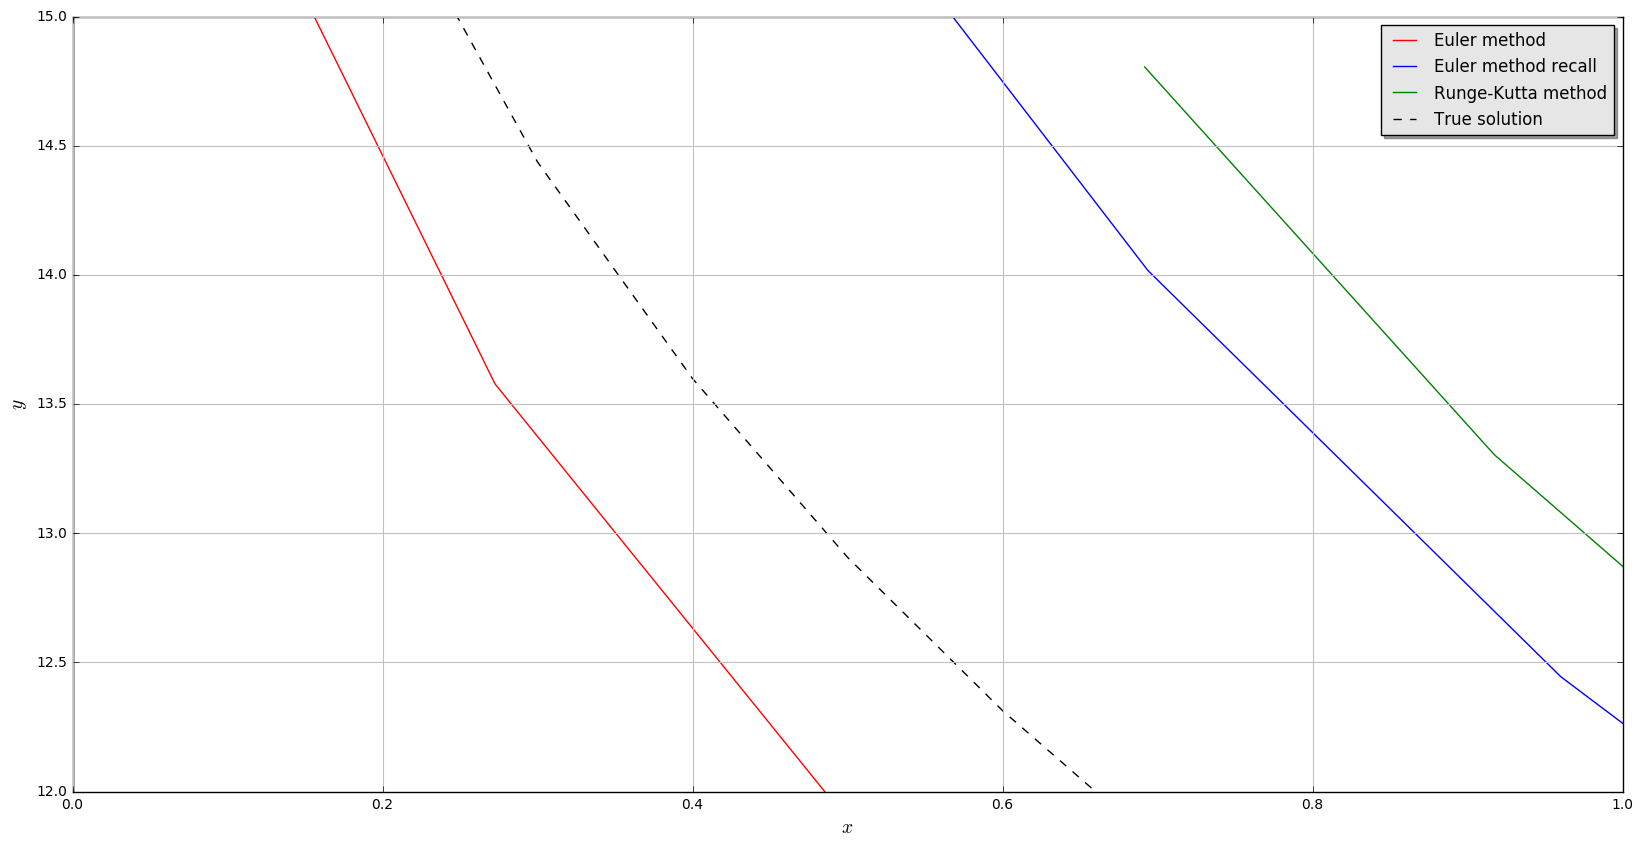

In [5]:
fig, ax = plt.subplots(figsize=(20,10))

xs, ys = euler_method([x_t, y_t], arange(start, end + h, h), [x_0, y_0], n)
ax.plot(ys[0], ys[1], '-r',label = 'Euler method')

xs, ys = euler_method_recal([x_t, y_t], arange(start, end + h, h), [x_0, y_0], n)
ax.plot(ys[0], ys[1], '-b',label = 'Euler method recall')

xs, ys = runge_kutta_4([x_t, y_t], arange(start, end + h, h), [x_0, y_0], n)
ax.plot(ys[0], ys[1], '-g',label = 'Runge-Kutta method')

true_line = lambda x : (x ** (k + 1)/((a ** k) * (k + 1)) - ((a ** k) * (x ** (1 - k)))/(1 - k))/2 + a * k/(1 - (k ** 2))
xs = arange(0, a + h, h)
ys = [true_line(x) for x in xs]
ax.plot(xs, ys, '--k', label = 'True solution')

plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)

plt.xlim(0, 1)
plt.ylim(12, 15)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color = 'black')
ax.axvline(0, color = 'black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper right', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()